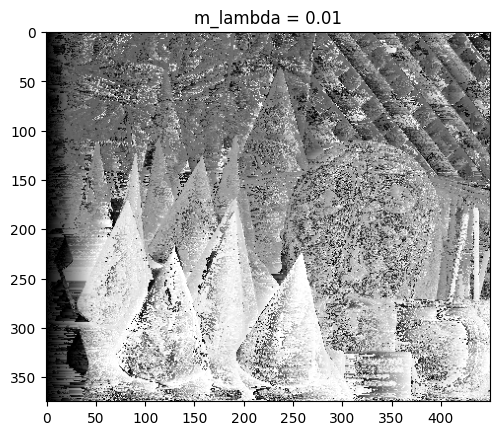

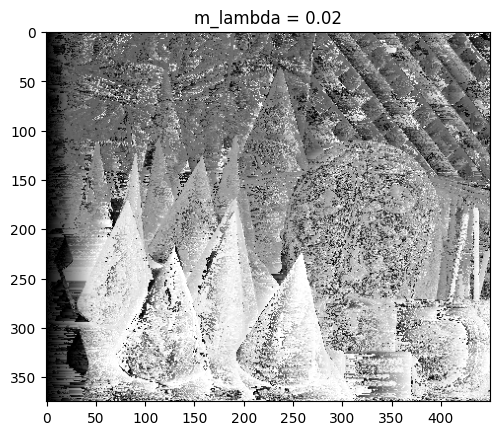

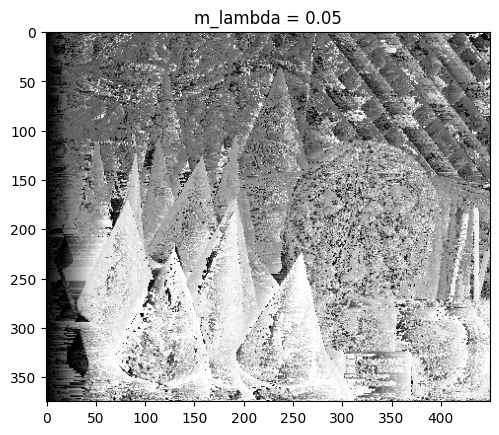

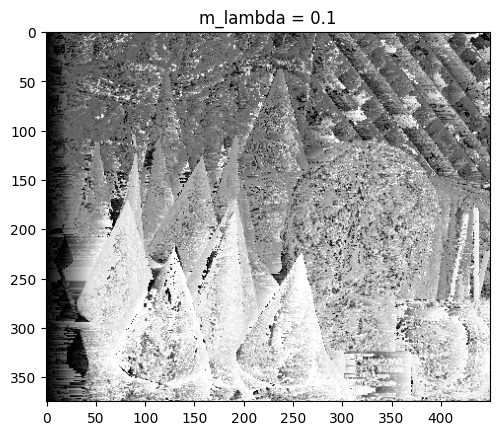

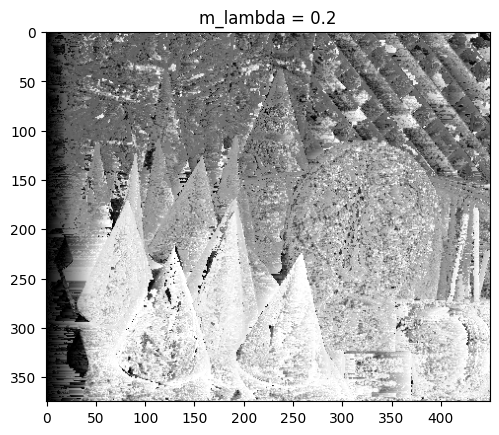

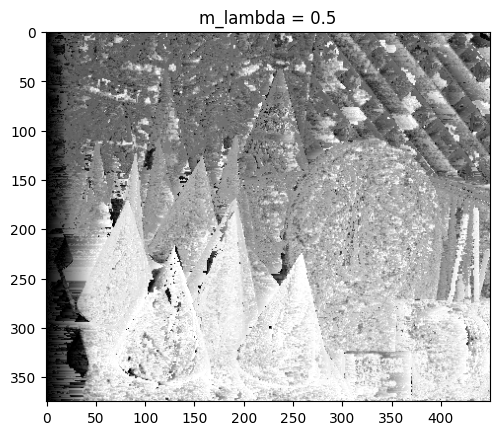

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from gco import pygco 
import cv2

def calculate_color_distance(a, b):
    # 计算两个RGB颜色之间的绝对颜色距离 # Calculate the absolute color distance between two RGB colors
    return np.mean((a.astype(float)-b.astype(float))**2)

# 读取输入图像 # Read the input image
LeftImage = cv2.imread('im2.png')
RightImage = cv2.imread('im6.png')

LeftImage = cv2.cvtColor(LeftImage,cv2.COLOR_BGR2RGB)
RightImage = cv2.cvtColor(RightImage,cv2.COLOR_BGR2RGB)
ResImage = LeftImage

SizeofLayers = 50

# 获取图像的高度和宽度 # Get the height and width of the image
Height, Width, _ = LeftImage.shape

UnaryPotentialArray = np.zeros([Height, Width, SizeofLayers])
PairwisePotentialEnergyMatrix = np.zeros((SizeofLayers, SizeofLayers))

#Generate Pairwise Potential EnergyMatrix
for i in range(SizeofLayers):
    for j in range(SizeofLayers):
        PairwisePotentialEnergyMatrix[i, j] = ((i - j) ** 2) / (SizeofLayers**2)

#Generate Univariate Probability Array
for y in range(0, Height):
    for x in range(0, Width):
        for i in range(0, SizeofLayers):
            LeftPixel = LeftImage[y][x]
            if (x-i) >= 0:
                RightPixel = RightImage[y][x-i]
            else :
                RightPixel = np.zeros(3)
            UnaryPotentialArray[y][x][i] = calculate_color_distance(LeftPixel, RightPixel) / 255

lambda_values = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5]

for m_lambda in lambda_values:
    n_labels = pygco.cut_grid_graph_simple(UnaryPotentialArray, PairwisePotentialEnergyMatrix * m_lambda, n_iter=-1, algorithm='swap')
    n_labels = n_labels.reshape(Height, Width)
        
    plt.imshow(n_labels, cmap='gray')
    plt.title(f'lambda = {m_lambda}')
    plt.show()

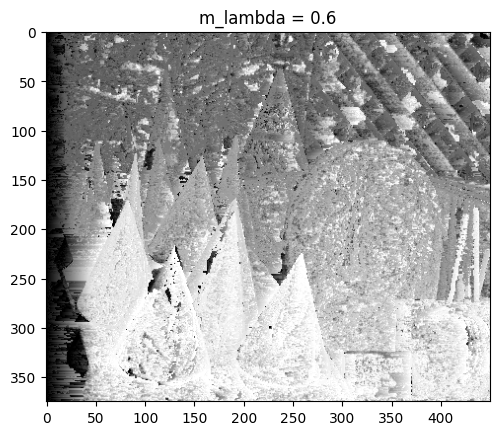

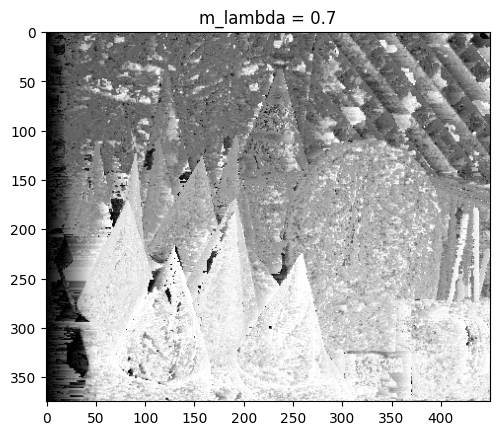

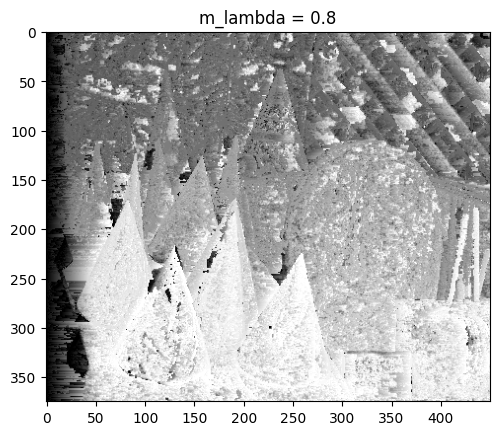

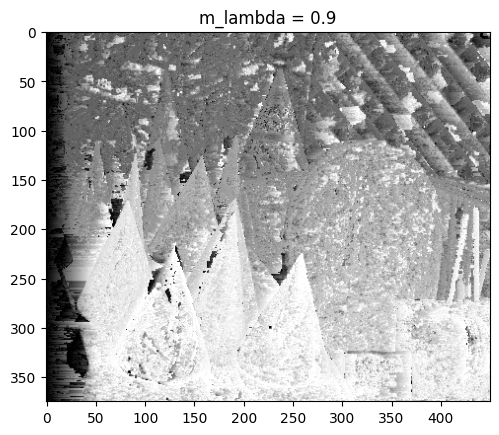

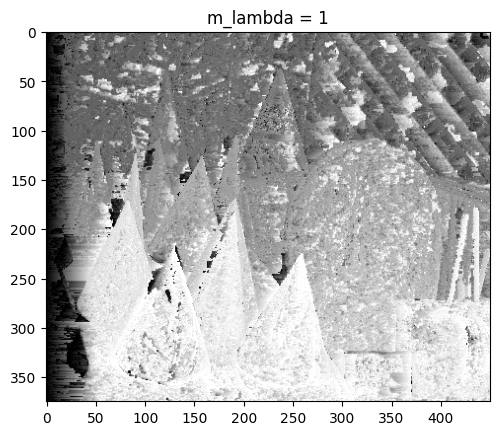

In [24]:
lambda_values = [0.6, 0.7, 0.8, 0.9, 1]

for m_lambda in lambda_values:
    n_labels = pygco.cut_grid_graph_simple(UnaryPotentialArray, PairwisePotentialEnergyMatrix * m_lambda, n_iter=-1, algorithm='swap')
    n_labels = n_labels.reshape(Height, Width)
        
    plt.imshow(n_labels, cmap='gray')
    plt.title(f'm_lambda = {m_lambda}')
    plt.show()

Overall, the above λ has achieved good results. From a trend point of view, the larger the λ, the cleaner the image, but at the same time, the less detailed information.